# Predicting diabetes
### My goal was to build a model, which would predict diabetes. 

Data source:
https://www.kaggle.com/uciml/pima-indians-diabetes-database


### Loading libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sci

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report


## Data exploration

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
percentage_distribution = df['Outcome'].value_counts(normalize=True)
percentage_distribution #Notice that 0's are much more frequent than 1's 

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [6]:
columns = list(df.columns.values)
columns.remove('Outcome')
columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

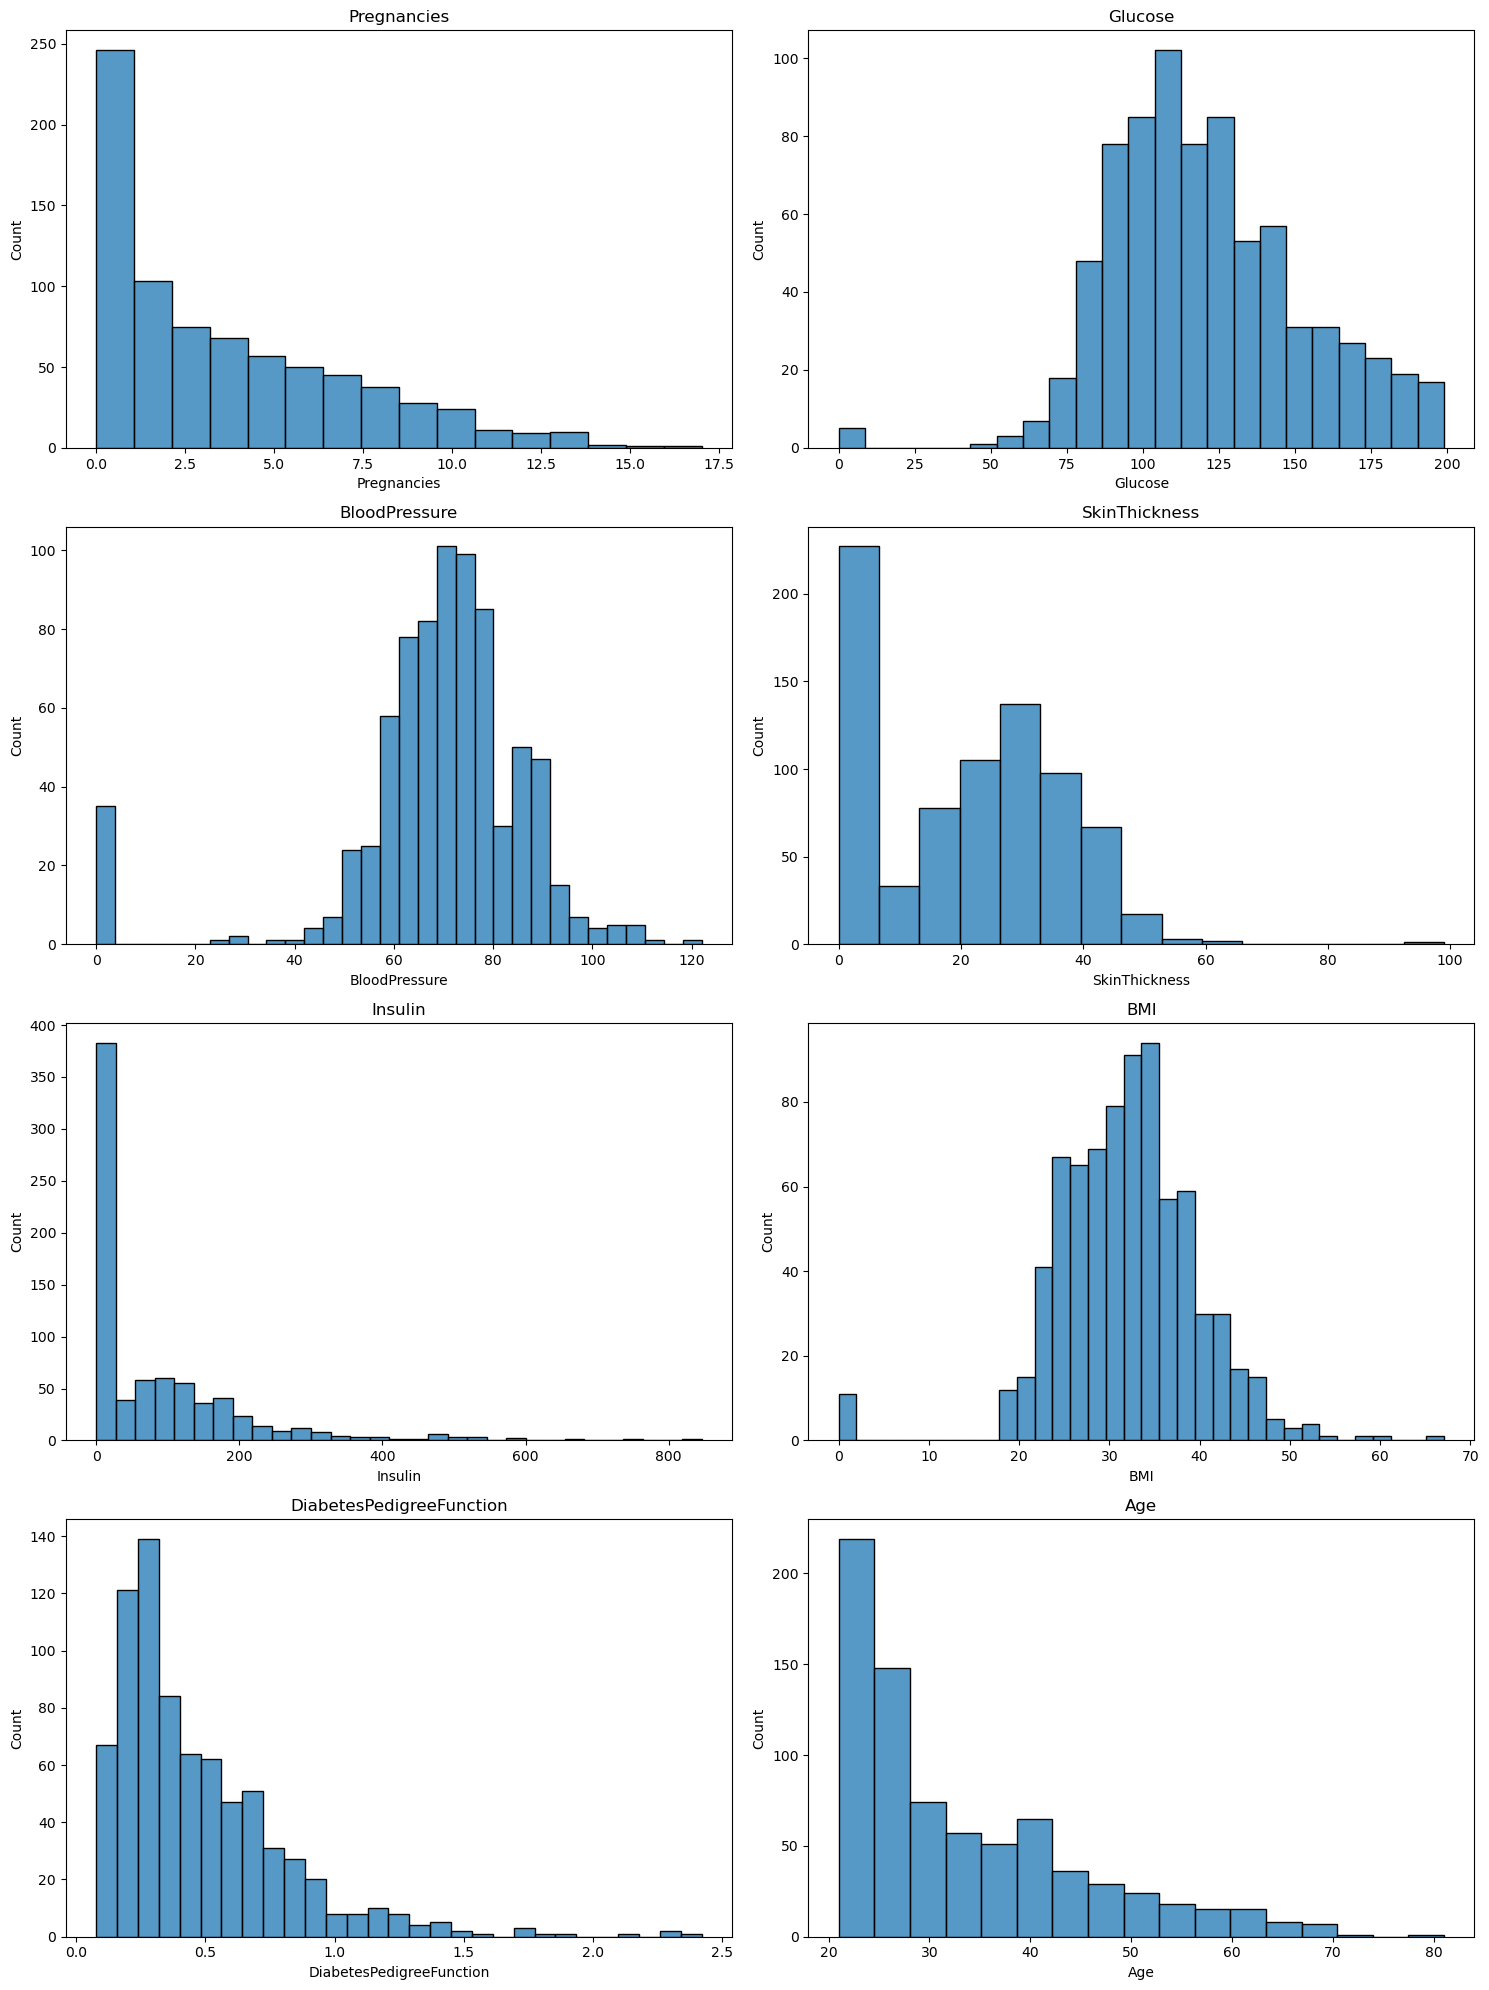

In [7]:
n_cols = 2
n_rows = (len(columns) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()


for i, col in enumerate(columns):
    sns.histplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'{col}')


for i in range(len(columns), n_rows * n_cols):
    fig.delaxes(axes[i])


plt.tight_layout()
plt.show()

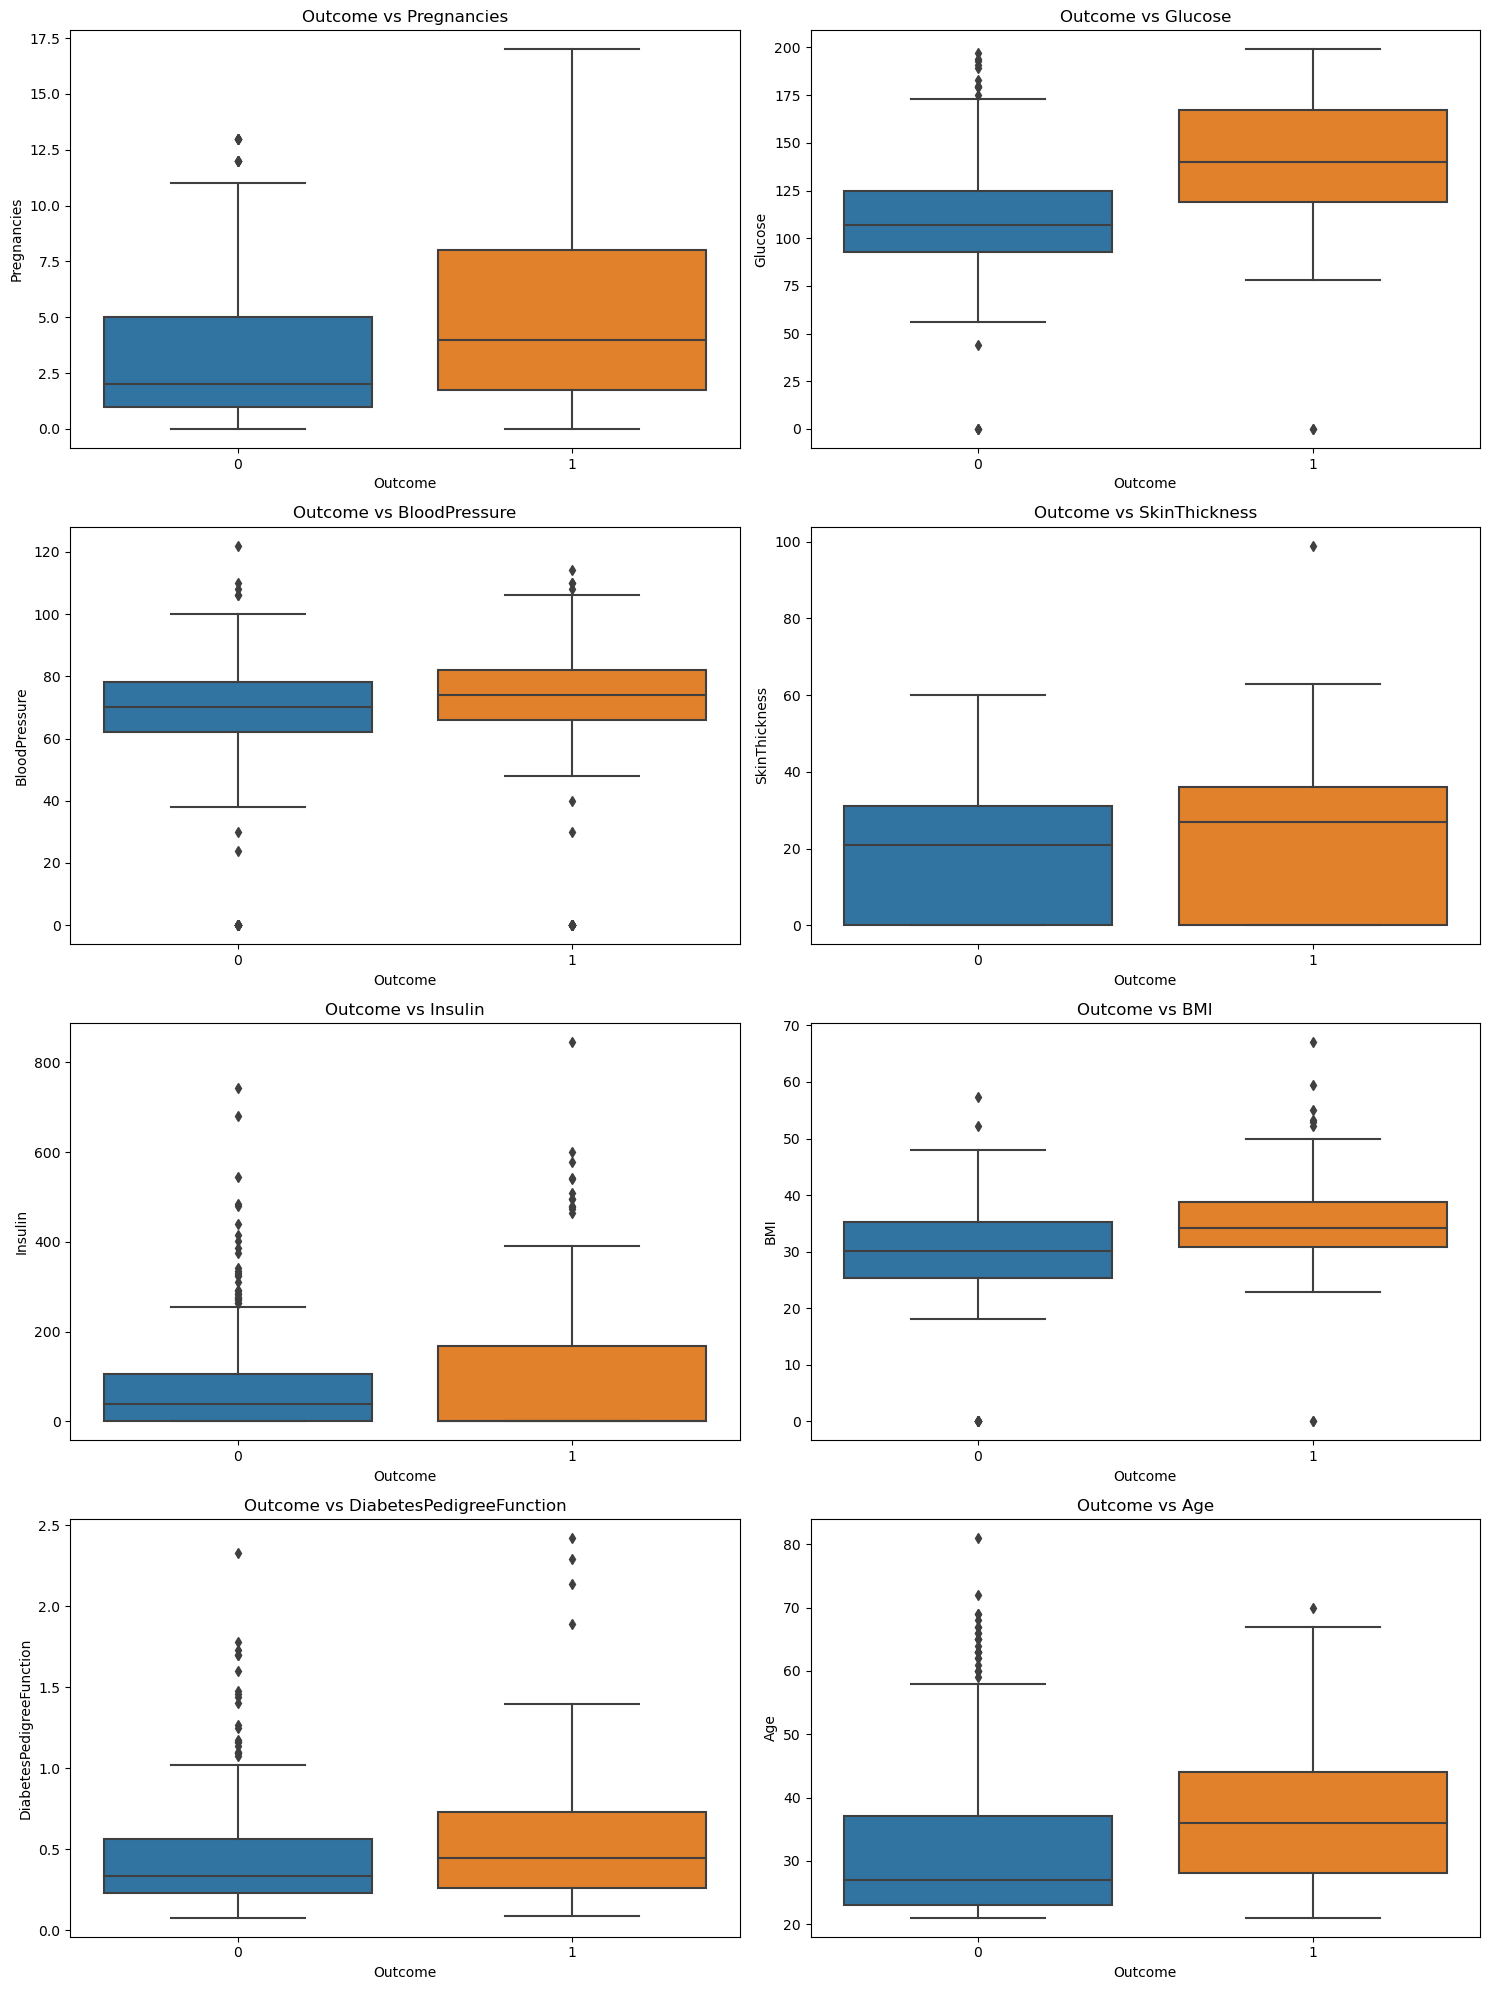

In [8]:
n_cols = 2
n_rows = (len(columns) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()

for i, col in enumerate(columns):
    sns.boxplot(data=df, x='Outcome', y=col, ax=axes[i])
    axes[i].set_title(f'Outcome vs {col}')


for i in range(len(columns), n_rows * n_cols):
    fig.delaxes(axes[i])


plt.tight_layout()
plt.show()

#### Checking for missing values

Based on the charts, you can see outliers and data that looks suspicious:
* Blood pressure, skin thickness or BMI cannot be 0, so I will convert missing values to mean values.
* Skin Thickness has a lot of data that looks suspicious, which translates to large missing data, so I won't use it in further analysis.

In [9]:
df_clean = df.copy(deep = True)
df_clean.drop(columns = ['SkinThickness'], inplace= True)
columns.remove('SkinThickness')
df_clean[['Glucose','BloodPressure','BMI']] = df_clean[['Glucose','BloodPressure','BMI']].replace(0,np.NaN)


In [10]:
df_clean.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,0,33.6,0.627,50,1
1,1,85.0,66.0,0,26.6,0.351,31,0
2,8,183.0,64.0,0,23.3,0.672,32,1
3,1,89.0,66.0,94,28.1,0.167,21,0
4,0,137.0,40.0,168,43.1,2.288,33,1


In [11]:
df_clean['Glucose'].fillna(df_clean['Glucose'].mean(), inplace = True)
df_clean['BloodPressure'].fillna(df_clean['BloodPressure'].mean(), inplace = True)
df_clean['BMI'].fillna(df_clean['BMI'].median(), inplace = True)

In [12]:
print(df_clean.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [13]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
df_clean.describe()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,79.799479,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,115.244002,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,0.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,30.500000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Correlations

In [15]:

correlations = []
for col in columns:
    corr_coeff, p_value = sci.pearsonr(df_clean['Outcome'], df_clean[col])
    correlations.append((col, corr_coeff, p_value))


correlations.sort(key=lambda x: abs(x[1]), reverse=True)


for col, corr_coeff, p_value in correlations:
    significance = "insignificant" if p_value > 0.05 else "significant"
    print(f"{col}:\n  Pearson correlation: {corr_coeff:.4f} ({significance})\n  p-value: {p_value:.4f}\n")

Glucose:
  Pearson correlation: 0.4929 (significant)
  p-value: 0.0000

BMI:
  Pearson correlation: 0.3120 (significant)
  p-value: 0.0000

Age:
  Pearson correlation: 0.2384 (significant)
  p-value: 0.0000

Pregnancies:
  Pearson correlation: 0.2219 (significant)
  p-value: 0.0000

DiabetesPedigreeFunction:
  Pearson correlation: 0.1738 (significant)
  p-value: 0.0000

BloodPressure:
  Pearson correlation: 0.1661 (significant)
  p-value: 0.0000

Insulin:
  Pearson correlation: 0.1305 (significant)
  p-value: 0.0003



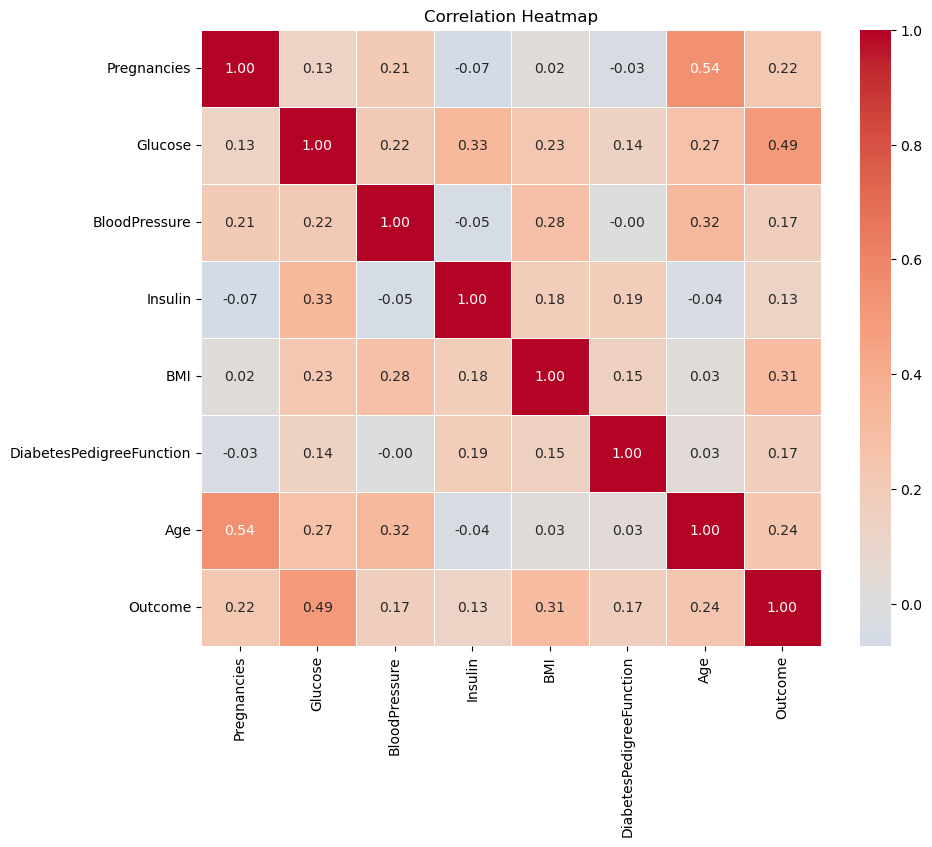

In [16]:
c = df_clean.corr() 


plt.figure(figsize=(10, 8))
sns.heatmap(c, annot=True, cmap='coolwarm', center=0, fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

## Feature Engineering and data preparation

Based on the correlations, the strongest and significant correlates with the outcome are:
* Glucose
* BMI
* Age
* Pregnancies


Weaker predictiors, which I will not be using in my model are:
* DiabetesPedigreeFunction 
* Insulin 
* BloodPressure 



### Here I will be making a copy of my dataset and including only features that will be used in modeling

In [17]:
df_model = df_clean.copy(deep = True)
columns_m = columns.copy()

In [18]:
df_model.drop(columns = ['BloodPressure'], inplace= True)
columns_m.remove('BloodPressure')

In [19]:
df_model.drop(columns = ['Insulin'], inplace= True)
columns_m.remove('Insulin')

In [20]:
df_model.drop(columns = ['DiabetesPedigreeFunction'], inplace= True)
columns_m.remove('DiabetesPedigreeFunction')

In [21]:
print(len(columns_m))
print(columns_m)

4
['Pregnancies', 'Glucose', 'BMI', 'Age']


In [22]:
print(len(columns))
print(columns)

7
['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [23]:
df_model.head()

,Pregnancies,Glucose,BMI,Age,Outcome
0,6,148.0,33.6,50,1
1,1,85.0,26.6,31,0
2,8,183.0,23.3,32,1
3,1,89.0,28.1,21,0
4,0,137.0,43.1,33,1


#### Train-test split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(df_model[columns_m], df_model['Outcome'], test_size=0.3, random_state = 1)

#### PCA

I run PCA on all original variables except SkinThicnkess. For this reason I'm working on df_clean, it contains the cleared data but all the columns.
I eliminated SkinThickness due to large data gaps making it impossible to assess the quality of the data.

In [25]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(df_clean[columns], df_clean['Outcome'], test_size=0.3, random_state = 1)

In [26]:
n_components = 7 
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_pca)
X_test_pca = pca.transform(X_test_pca)


# Decision tree classifier

I will be comparing two models - one based on PCA and another based on features chosen by me, as explained above. 

## Model based on my feature choices

### Parameter tuning

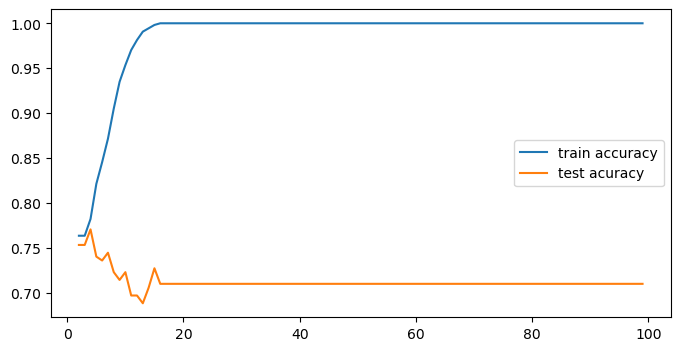

The best max_depth value is 4 with test accuracy of 0.7705627705627706


In [27]:
max_depths = list(range(2, 100))
train_acc = []
test_acc = []


for param in max_depths:
    model = DecisionTreeClassifier(max_depth=param, random_state=1).fit(X_train, y_train)
    predict_train = model.predict(X_train)
    predict_test = model.predict(X_test)
    train_acc.append(accuracy_score(predict_train, y_train))
    test_acc.append(accuracy_score(predict_test, y_test))
    

# Find the index of the highest test accuracy
highest_test_acc_index = test_acc.index(max(test_acc))
# Find the corresponding max_depth value
best_max_depth = max_depths[highest_test_acc_index]

plt.figure(figsize = (8, 4))
plt.plot(max_depths, train_acc, label = 'train accuracy')
plt.plot(max_depths, test_acc, label = 'test acuracy')
plt.legend()
plt.show()   

# Print the max_depth value with the highest test accuracy
print(f"The best max_depth value is {best_max_depth} with test accuracy of {test_acc[highest_test_acc_index]}")

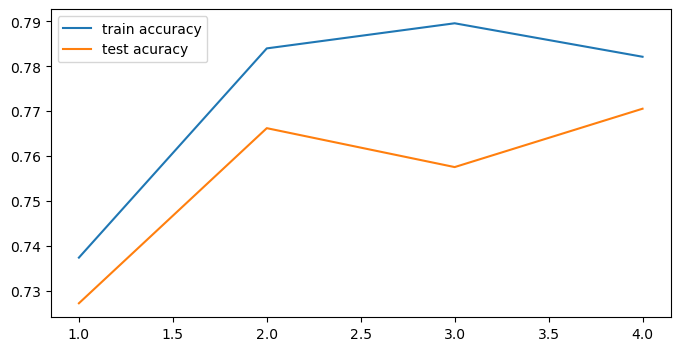

The best max_features value is 4 with test accuracy of 0.7705627705627706


In [28]:
max_features = list(range(1, 4+1))
train_acc = []
test_acc = []

for param in max_features:
    model = DecisionTreeClassifier(max_features=param, random_state=1, max_depth = best_max_depth).fit(X_train, y_train)
    predict_train = model.predict(X_train)
    predict_test = model.predict(X_test)
    train_acc.append(accuracy_score(predict_train, y_train))
    test_acc.append(accuracy_score(predict_test, y_test))


highest_test_acc_index = test_acc.index(max(test_acc))
best_max_features = max_features[highest_test_acc_index]

    
plt.figure(figsize = (8, 4))
plt.plot(max_features, train_acc, label = 'train accuracy')
plt.plot(max_features, test_acc, label = 'test acuracy')
plt.legend()
plt.show()   

print(f"The best max_features value is {best_max_features} with test accuracy of {test_acc[highest_test_acc_index]}")

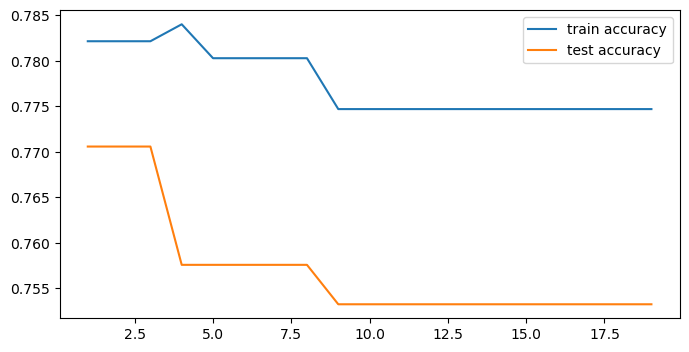

The best min_samples_leaf value is 1 with test accuracy of 0.7705627705627706


In [29]:
params = list(range(1, 20))
train_acc = []
test_acc = []

for param in params:
    model = DecisionTreeClassifier(random_state=1, min_samples_leaf=param, max_depth = best_max_depth, max_features = best_max_features).fit(X_train, y_train)
    predict_train = model.predict(X_train)
    predict_test = model.predict(X_test)
    train_acc.append(accuracy_score(predict_train, y_train))
    test_acc.append(accuracy_score(predict_test, y_test))

highest_test_acc_index = test_acc.index(max(test_acc))
best_min_samples_leaf = params[highest_test_acc_index]

plt.figure(figsize=(8, 4))
plt.plot(params, train_acc, label='train accuracy')
plt.plot(params, test_acc, label='test accuracy')
plt.legend()
plt.show()

print(f"The best min_samples_leaf value is {best_min_samples_leaf} with test accuracy of {test_acc[highest_test_acc_index]}")


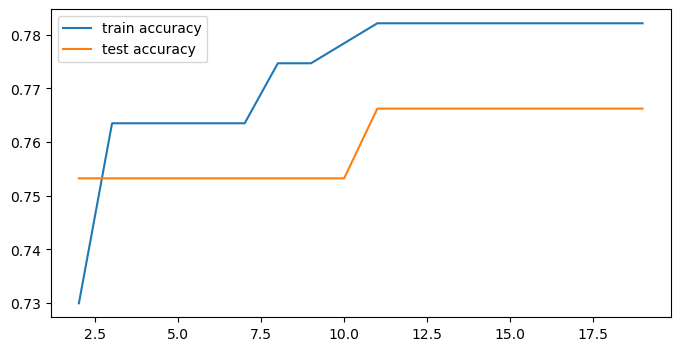

The best max_leaf_nodes value is 11 with test accuracy of 0.7662337662337663


In [30]:
params = list(range(2, 20))
train_acc = []
test_acc = []

for param in params:
    model = DecisionTreeClassifier(max_leaf_nodes=param, random_state=1, min_samples_leaf= best_min_samples_leaf, max_depth = best_max_depth, max_features = best_max_features).fit(X_train, y_train)
    predict_train = model.predict(X_train)
    predict_test = model.predict(X_test)
    train_acc.append(accuracy_score(predict_train, y_train))
    test_acc.append(accuracy_score(predict_test, y_test))

highest_test_acc_index = test_acc.index(max(test_acc))
best_max_leaf_nodes = params[highest_test_acc_index]

plt.figure(figsize=(8, 4))
plt.plot(params, train_acc, label='train accuracy')
plt.plot(params, test_acc, label='test accuracy')
plt.legend()
plt.show()

print(f"The best max_leaf_nodes value is {best_max_leaf_nodes} with test accuracy of {test_acc[highest_test_acc_index]}")


### Training

In [31]:
tree_clf = DecisionTreeClassifier(random_state=1, min_samples_leaf= best_min_samples_leaf, max_depth = best_max_depth, max_features = best_max_features, max_leaf_nodes= best_max_leaf_nodes)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, max_features=4, max_leaf_nodes=11,
                       random_state=1)

In [32]:
pred_DTC_train = tree_clf.predict(X_train)
pred_DTC_test = tree_clf.predict(X_test)

print("Accuracy on training set: {:.2f}".format(tree_clf.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(tree_clf.score(X_test, y_test)))

Accuracy on training set: 0.78
Accuracy on test set: 0.77


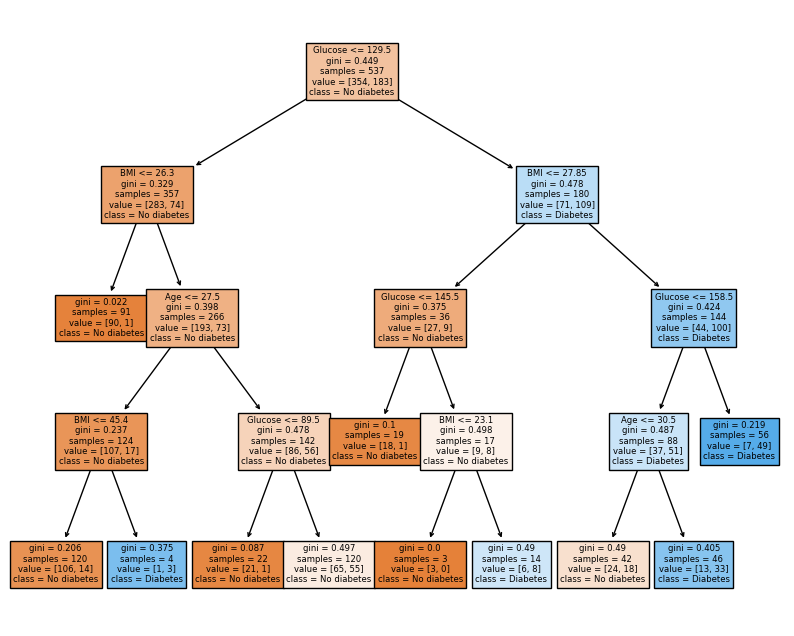

In [80]:
class_name_dict = {0: 'No diabetes', 1: 'Diabetes'}


class_names = y_train.unique()
class_names.sort() 

class_names_str = [class_name_dict[class_name] for class_name in class_names]

plt.figure(figsize=(10, 8))
plot_tree(tree_clf,
          feature_names=columns_m,
          class_names=class_names_str,
          filled=True)
plt.show()

## PCA-based model

### Parameter tuning

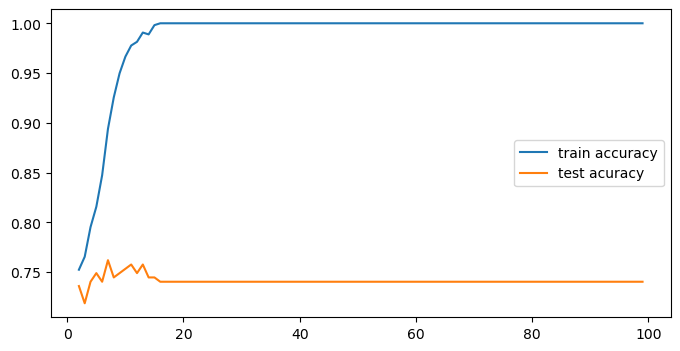

The best max_depth value is 7 with test accuracy of 0.7619047619047619


In [34]:
max_depths = list(range(2, 100))
train_acc = []
test_acc = []


for param in max_depths:
    model = DecisionTreeClassifier(max_depth=param, random_state=1).fit(X_train_pca, y_train_pca)
    predict_train = model.predict(X_train_pca)
    predict_test = model.predict(X_test_pca)
    train_acc.append(accuracy_score(predict_train, y_train_pca))
    test_acc.append(accuracy_score(predict_test, y_test_pca))
    

# Find the index of the highest test accuracy
highest_test_acc_index = test_acc.index(max(test_acc))
# Find the corresponding max_depth value
best_max_depth = max_depths[highest_test_acc_index]

plt.figure(figsize = (8, 4))
plt.plot(max_depths, train_acc, label = 'train accuracy')
plt.plot(max_depths, test_acc, label = 'test acuracy')
plt.legend()
plt.show()   

# Print the max_depth value with the highest test accuracy
print(f"The best max_depth value is {best_max_depth} with test accuracy of {test_acc[highest_test_acc_index]}")

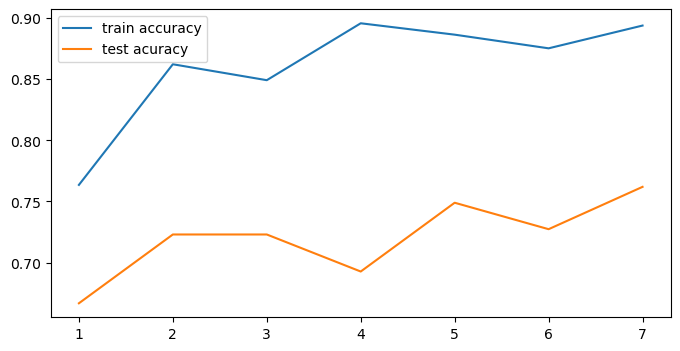

The best max_features value is 7 with test accuracy of 0.7619047619047619


In [35]:
max_features = list(range(1, 7+1))
train_acc = []
test_acc = []

for param in max_features:
    model = DecisionTreeClassifier(max_features=param, random_state=1, max_depth = best_max_depth).fit(X_train_pca, y_train_pca)
    predict_train = model.predict(X_train_pca)
    predict_test = model.predict(X_test_pca)
    train_acc.append(accuracy_score(predict_train, y_train_pca))
    test_acc.append(accuracy_score(predict_test, y_test_pca))


highest_test_acc_index = test_acc.index(max(test_acc))
best_max_features = max_features[highest_test_acc_index]

    
plt.figure(figsize = (8, 4))
plt.plot(max_features, train_acc, label = 'train accuracy')
plt.plot(max_features, test_acc, label = 'test acuracy')
plt.legend()
plt.show()   

print(f"The best max_features value is {best_max_features} with test accuracy of {test_acc[highest_test_acc_index]}")

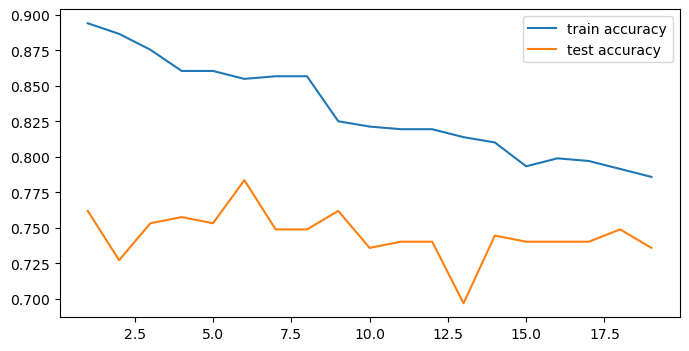

The best min_samples_leaf value is 6 with test accuracy of 0.7835497835497836


In [36]:
min_samples_leafs = list(range(1, 20))
train_acc = []
test_acc = []

for param in min_samples_leafs:
    model = DecisionTreeClassifier(min_samples_leaf=param, random_state=1, max_depth = best_max_depth, max_features=best_max_features).fit(X_train_pca, y_train_pca)
    predict_train = model.predict(X_train_pca)
    predict_test = model.predict(X_test_pca)
    train_acc.append(accuracy_score(predict_train, y_train_pca))
    test_acc.append(accuracy_score(predict_test, y_test_pca))

highest_test_acc_index = test_acc.index(max(test_acc))
best_min_samples_leaf = min_samples_leafs[highest_test_acc_index]

plt.figure(figsize=(8, 4))
plt.plot(min_samples_leafs, train_acc, label='train accuracy')
plt.plot(min_samples_leafs, test_acc, label='test accuracy')
plt.legend()
plt.show()

print(f"The best min_samples_leaf value is {best_min_samples_leaf} with test accuracy of {test_acc[highest_test_acc_index]}")


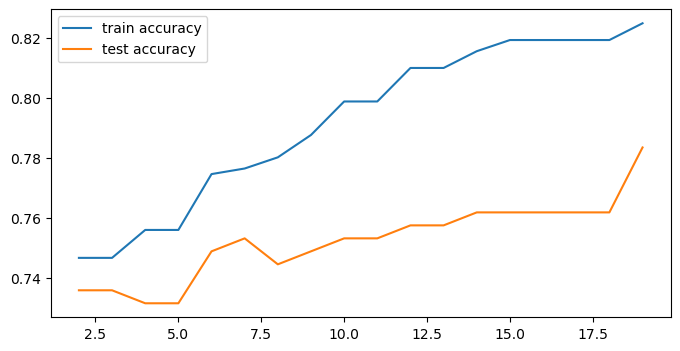

The best max_leaf_nodes value is 19 with test accuracy of 0.7835497835497836


In [37]:
max_leaf_nodess = list(range(2, 20))
train_acc = []
test_acc = []

for param in max_leaf_nodess:
    model = DecisionTreeClassifier(max_leaf_nodes=param, random_state=1, max_depth = best_max_depth, min_samples_leaf= best_min_samples_leaf, max_features=best_max_features).fit(X_train_pca, y_train_pca)
    predict_train = model.predict(X_train_pca)
    predict_test = model.predict(X_test_pca)
    train_acc.append(accuracy_score(predict_train, y_train_pca))
    test_acc.append(accuracy_score(predict_test, y_test_pca))

highest_test_acc_index = test_acc.index(max(test_acc))
best_max_leaf_nodes = max_leaf_nodess[highest_test_acc_index]

plt.figure(figsize=(8, 4))
plt.plot(max_leaf_nodess, train_acc, label='train accuracy')
plt.plot(max_leaf_nodess, test_acc, label='test accuracy')
plt.legend()
plt.show()

print(f"The best max_leaf_nodes value is {best_max_leaf_nodes} with test accuracy of {test_acc[highest_test_acc_index]}")


###  PCA-model training

In [38]:
tree_clf_pca = DecisionTreeClassifier(random_state = 1, max_leaf_nodes = best_max_leaf_nodes, max_depth = best_max_depth, min_samples_leaf = best_min_samples_leaf, max_features = best_max_features)
tree_clf_pca.fit(X_train_pca, y_train_pca)

DecisionTreeClassifier(max_depth=7, max_features=7, max_leaf_nodes=19,
                       min_samples_leaf=6, random_state=1)

In [39]:
pred_DTC_train_pca = tree_clf_pca.predict(X_train_pca)
pred_DTC_test_pca = tree_clf_pca.predict(X_test_pca)

print("Accuracy on training set: {:.2f}".format(tree_clf_pca.score(X_train_pca, y_train_pca)))
print("Accuracy on test set: {:.2f}".format(tree_clf_pca.score(X_test_pca, y_test_pca)))

Accuracy on training set: 0.82
Accuracy on test set: 0.78


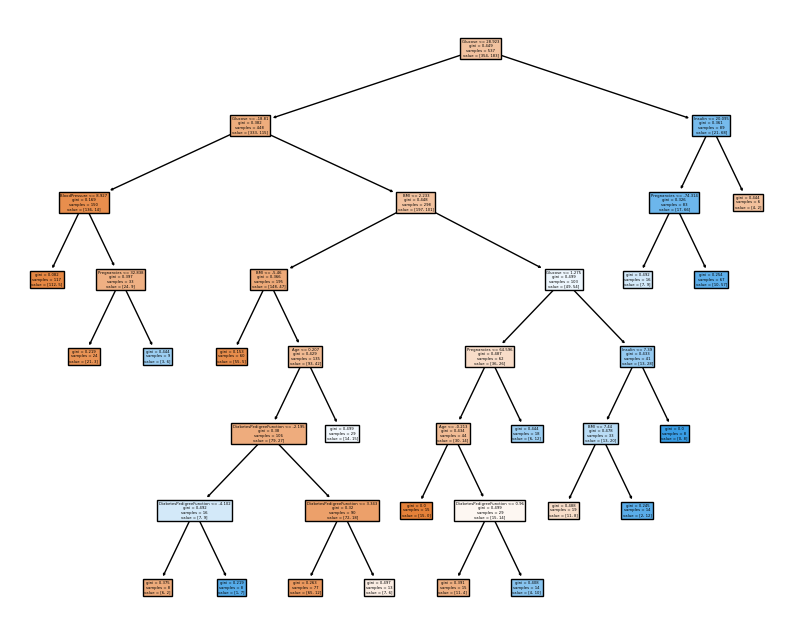

In [40]:
plt.figure(figsize = (10, 8))

plot_tree(tree_clf_pca,
          feature_names = columns,
          filled=True);

# Random forest 

Again I will be comparing two models - one based on my own feature engineering and one based on PCA.

## Model based on my own features

### Parameter tuning

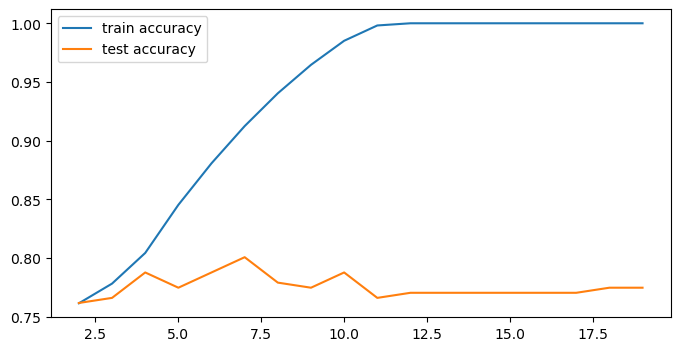

The best max_depth value for RandomForest is 7 with test accuracy of 0.8008658008658008


In [41]:
max_depths = list(range(2, 20))
train_acc = []
test_acc = []

for param in max_depths:
    model = RandomForestClassifier(max_depth=param, random_state=1).fit(X_train, y_train)
    predict_train = model.predict(X_train)
    predict_test = model.predict(X_test)
    train_acc.append(accuracy_score(predict_train, y_train))
    test_acc.append(accuracy_score(predict_test, y_test))

highest_test_acc_index = test_acc.index(max(test_acc))
best_max_depth = max_depths[highest_test_acc_index]

plt.figure(figsize = (8, 4))
plt.plot(max_depths, train_acc, label='train accuracy')
plt.plot(max_depths, test_acc, label='test accuracy')
plt.legend()
plt.show()

print(f"The best max_depth value for RandomForest is {best_max_depth} with test accuracy of {test_acc[highest_test_acc_index]}")


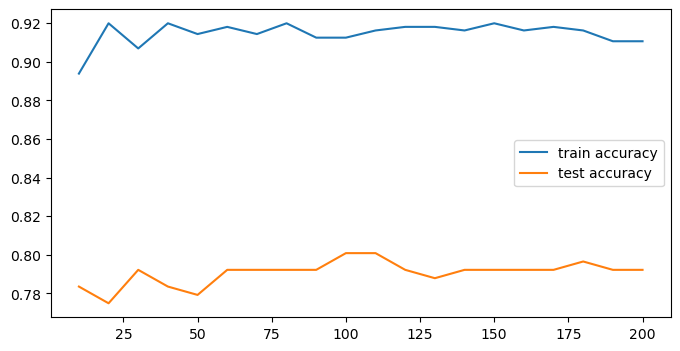

The best n_estimators value for RandomForest is 100 with test accuracy of 0.8008658008658008


In [42]:

n_estimatorss = list(range(10, 201, 10))  
train_acc = []
test_acc = []

for param in n_estimatorss:
    model = RandomForestClassifier(n_estimators=param, random_state=1, max_depth = best_max_depth).fit(X_train, y_train)
    predict_train = model.predict(X_train)
    predict_test = model.predict(X_test)
    train_acc.append(accuracy_score(predict_train, y_train))
    test_acc.append(accuracy_score(predict_test, y_test))

highest_test_acc_index = test_acc.index(max(test_acc))
best_n_estimators = n_estimatorss[highest_test_acc_index]

plt.figure(figsize = (8, 4))
plt.plot(n_estimatorss, train_acc, label='train accuracy')
plt.plot(n_estimatorss, test_acc, label='test accuracy')
plt.legend()
plt.show()

print(f"The best n_estimators value for RandomForest is {best_n_estimators} with test accuracy of {test_acc[highest_test_acc_index]}")


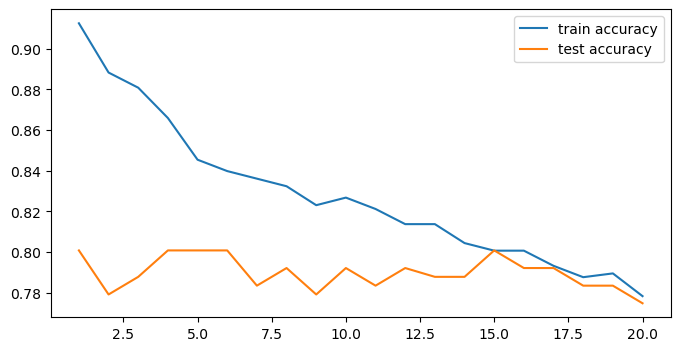

The best min_samples_leaf value for RandomForest is 1 with test accuracy of 0.8008658008658008


In [43]:

min_samples_leafs= list(range(1, 21))  
train_acc = []
test_acc = []

for param in min_samples_leafs:
    model = RandomForestClassifier(min_samples_leaf = param, n_estimators= best_n_estimators, max_depth = best_max_depth, random_state = 1).fit(X_train, y_train)
    predict_train = model.predict(X_train)
    predict_test = model.predict(X_test)
    train_acc.append(accuracy_score(predict_train, y_train))
    test_acc.append(accuracy_score(predict_test, y_test))

highest_test_acc_index = test_acc.index(max(test_acc))
best_min_samples_leaf = min_samples_leafs[highest_test_acc_index]


plt.figure(figsize = (8, 4))
plt.plot(min_samples_leafs, train_acc, label='train accuracy')
plt.plot(min_samples_leafs, test_acc, label='test accuracy')
plt.legend()
plt.show()

print(f"The best min_samples_leaf value for RandomForest is {best_min_samples_leaf} with test accuracy of {test_acc[highest_test_acc_index]}")



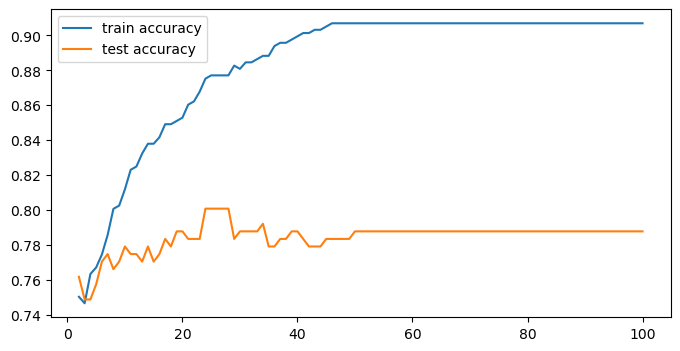

The best max_leaf_nodes value for RandomForest is 24 with test accuracy of 0.8008658008658008


In [44]:
max_leaf_nodess = list(range(2, 101))  
train_acc = []
test_acc = []

for param in max_leaf_nodess:
    model = RandomForestClassifier(max_leaf_nodes=param, n_estimators = best_n_estimators, min_samples_leaf = best_min_samples_leaf, max_depth= best_max_depth, random_state=1).fit(X_train, y_train)
    predict_train = model.predict(X_train)
    predict_test = model.predict(X_test)
    train_acc.append(accuracy_score(predict_train, y_train))
    test_acc.append(accuracy_score(predict_test, y_test))

highest_test_acc_index = test_acc.index(max(test_acc))
best_max_leaf_nodes = max_leaf_nodess[highest_test_acc_index]


plt.figure(figsize = (8, 4))
plt.plot(max_leaf_nodess, train_acc, label='train accuracy')
plt.plot(max_leaf_nodess, test_acc, label='test accuracy')
plt.legend()
plt.show()

print(f"The best max_leaf_nodes value for RandomForest is {best_max_leaf_nodes} with test accuracy of {test_acc[highest_test_acc_index]}")


### Training and evaluation

In [45]:
rfc = RandomForestClassifier(random_state = 1, max_leaf_nodes = best_max_leaf_nodes, n_estimators = 100, min_samples_leaf = 1, max_depth = best_max_depth)
rfc  = rfc.fit(X_train, y_train)
rfc

RandomForestClassifier(max_depth=7, max_leaf_nodes=24, random_state=1)

In [46]:
pred_rfc_train = rfc.predict(X_train)
pred_rfc_test = rfc.predict(X_test)

In [47]:
print("Accuracy on training set: {:.2f}".format(rfc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(rfc.score(X_test, y_test)))

Accuracy on training set: 0.88
Accuracy on test set: 0.80


## PCA

### Parameter tuning

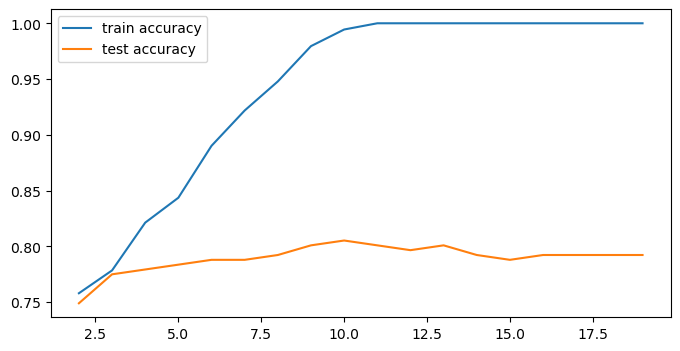

The best max_depth value for RandomForest is 10 with test accuracy of 0.8051948051948052


In [48]:
max_depths = list(range(2, 20))
train_acc = []
test_acc = []

for param in max_depths:
    model = RandomForestClassifier(max_depth=param, random_state=1).fit(X_train_pca, y_train_pca)
    predict_train = model.predict(X_train_pca)
    predict_test = model.predict(X_test_pca)
    train_acc.append(accuracy_score(predict_train, y_train_pca))
    test_acc.append(accuracy_score(predict_test, y_test_pca))

highest_test_acc_index = test_acc.index(max(test_acc))
best_max_depth = max_depths[highest_test_acc_index]

plt.figure(figsize = (8, 4))
plt.plot(max_depths, train_acc, label='train accuracy')
plt.plot(max_depths, test_acc, label='test accuracy')
plt.legend()
plt.show()

print(f"The best max_depth value for RandomForest is {best_max_depth} with test accuracy of {test_acc[highest_test_acc_index]}")


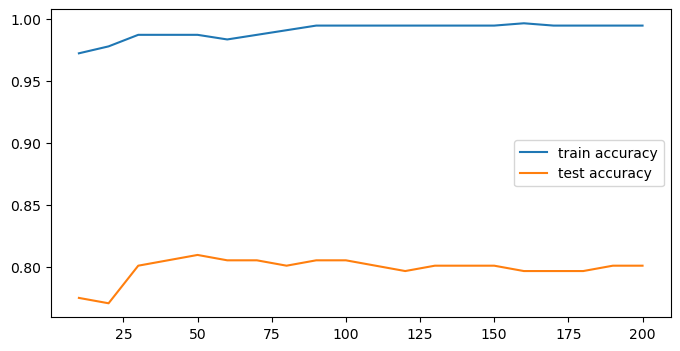

The best n_estimators value for RandomForest is 50 with test accuracy of 0.8095238095238095


In [49]:

n_estimatorss = list(range(10, 201, 10))  
train_acc = []
test_acc = []

for param in n_estimatorss:
    model = RandomForestClassifier(n_estimators=param, random_state=1, max_depth= best_max_depth).fit(X_train_pca, y_train_pca)
    predict_train = model.predict(X_train_pca)
    predict_test = model.predict(X_test_pca)
    train_acc.append(accuracy_score(predict_train, y_train_pca))
    test_acc.append(accuracy_score(predict_test, y_test_pca))

highest_test_acc_index = test_acc.index(max(test_acc))
best_n_estimators = n_estimatorss[highest_test_acc_index]

plt.figure(figsize = (8, 4))
plt.plot(n_estimatorss, train_acc, label='train accuracy')
plt.plot(n_estimatorss, test_acc, label='test accuracy')
plt.legend()
plt.show()

print(f"The best n_estimators value for RandomForest is {best_n_estimators} with test accuracy of {test_acc[highest_test_acc_index]}")


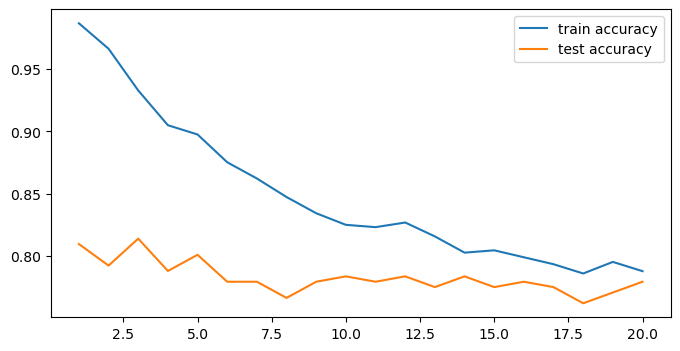

The best min_samples_leaf value for RandomForest is 3 with test accuracy of 0.8138528138528138


In [50]:

min_samples_leafs = list(range(1, 21))  
train_acc = []
test_acc = []

for param in min_samples_leafs:
    model = RandomForestClassifier(min_samples_leaf=param, n_estimators=best_n_estimators, max_depth= best_max_depth, random_state=1).fit(X_train_pca, y_train_pca)
    predict_train = model.predict(X_train_pca)
    predict_test = model.predict(X_test_pca)
    train_acc.append(accuracy_score(predict_train, y_train_pca))
    test_acc.append(accuracy_score(predict_test, y_test_pca))

highest_test_acc_index = test_acc.index(max(test_acc))
best_min_samples_leaf = min_samples_leafs[highest_test_acc_index]


plt.figure(figsize = (8, 4))
plt.plot(min_samples_leafs, train_acc, label='train accuracy')
plt.plot(min_samples_leafs, test_acc, label='test accuracy')
plt.legend()
plt.show()

print(f"The best min_samples_leaf value for RandomForest is {best_min_samples_leaf} with test accuracy of {test_acc[highest_test_acc_index]}")


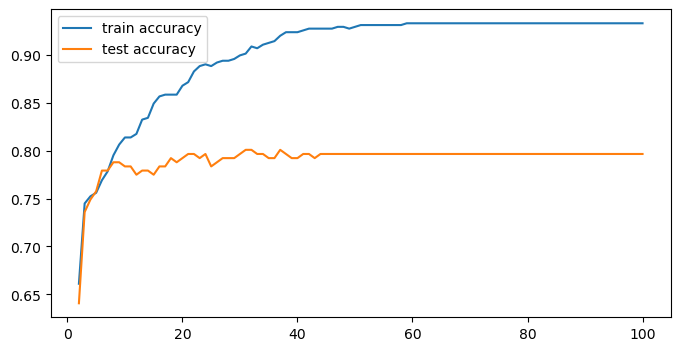

The best max_leaf_nodes value for RandomForest is 31 with test accuracy of 0.8008658008658008


In [51]:
max_leaf_nodess = list(range(2, 101))  
train_acc = []
test_acc = []

for param in max_leaf_nodess:
    model = RandomForestClassifier(max_leaf_nodes=param, n_estimators=best_n_estimators, min_samples_leaf=best_min_samples_leaf, max_depth= best_max_depth, random_state=1).fit(X_train_pca, y_train_pca)
    predict_train = model.predict(X_train_pca)
    predict_test = model.predict(X_test_pca)
    train_acc.append(accuracy_score(predict_train, y_train_pca))
    test_acc.append(accuracy_score(predict_test, y_test_pca))

highest_test_acc_index = test_acc.index(max(test_acc))
best_max_leaf_nodes = max_leaf_nodess[highest_test_acc_index]


plt.figure(figsize = (8, 4))
plt.plot(max_leaf_nodess, train_acc, label='train accuracy')
plt.plot(max_leaf_nodess, test_acc, label='test accuracy')
plt.legend()
plt.show()

print(f"The best max_leaf_nodes value for RandomForest is {best_max_leaf_nodes} with test accuracy of {test_acc[highest_test_acc_index]}")


### PCA-based model training and evaluation

In [52]:
rfc_pca = RandomForestClassifier(n_estimators = best_n_estimators, min_samples_leaf = best_min_samples_leaf, max_leaf_nodes= best_max_leaf_nodes, max_depth= best_max_depth, random_state=1)
rfc_pca  = rfc_pca.fit(X_train_pca, y_train_pca)
rfc_pca


RandomForestClassifier(max_depth=10, max_leaf_nodes=31, min_samples_leaf=3,
                       n_estimators=50, random_state=1)

In [53]:
pred_rfc_train_pca = rfc_pca.predict(X_train_pca)
pred_rfc_test_pca = rfc_pca.predict(X_test_pca)

print("Accuracy on training set: {:.2f}".format(rfc_pca.score(X_train_pca, y_train_pca)))
print("Accuracy on test set: {:.2f}".format(rfc_pca.score(X_test_pca, y_test_pca)))

Accuracy on training set: 0.90
Accuracy on test set: 0.80


# Comparing the models



### For decision tree models

In [54]:
print(classification_report(y_train, pred_DTC_train))

              precision    recall  f1-score   support

           0       0.78      0.92      0.85       354
           1       0.78      0.51      0.61       183

    accuracy                           0.78       537
   macro avg       0.78      0.72      0.73       537
weighted avg       0.78      0.78      0.77       537



In [55]:
print(classification_report(y_test, pred_DTC_test))

              precision    recall  f1-score   support

           0       0.77      0.89      0.83       146
           1       0.75      0.55      0.64        85

    accuracy                           0.77       231
   macro avg       0.76      0.72      0.73       231
weighted avg       0.76      0.77      0.76       231



In [56]:
print(classification_report(y_train, pred_DTC_train_pca))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       354
           1       0.74      0.74      0.74       183

    accuracy                           0.82       537
   macro avg       0.81      0.81      0.81       537
weighted avg       0.82      0.82      0.82       537



In [57]:
print(classification_report(y_test, pred_DTC_test_pca))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       146
           1       0.73      0.65      0.69        85

    accuracy                           0.78       231
   macro avg       0.77      0.76      0.76       231
weighted avg       0.78      0.78      0.78       231



### For random forest models

In [58]:
print(classification_report(y_train, pred_rfc_train))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       354
           1       0.87      0.74      0.80       183

    accuracy                           0.88       537
   macro avg       0.87      0.84      0.86       537
weighted avg       0.87      0.88      0.87       537



In [59]:
print(classification_report(y_test, pred_rfc_test)) #Best outcome

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       146
           1       0.75      0.69      0.72        85

    accuracy                           0.80       231
   macro avg       0.79      0.78      0.78       231
weighted avg       0.80      0.80      0.80       231



In [60]:
print(classification_report(y_train, pred_rfc_train_pca)) 

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       354
           1       0.92      0.78      0.84       183

    accuracy                           0.90       537
   macro avg       0.91      0.87      0.89       537
weighted avg       0.90      0.90      0.90       537



In [61]:
print(classification_report(y_test, pred_rfc_test_pca)) 

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       146
           1       0.82      0.59      0.68        85

    accuracy                           0.80       231
   macro avg       0.81      0.76      0.77       231
weighted avg       0.80      0.80      0.79       231



# Conclusion

In sum, Random Forest Classifier with parameters chosen by me was the best model based on high F1 score. 

Other models may have higher accuracy predicting lack of diabetes, but keeping in mind that we want to predict as much diabetes as possible in order to start the treatment F1 score would be a good performance measure.
